# Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Loading The Data Set

In [3]:
data=pd.read_csv('diabetes.csv')

In [4]:
#Displaying the first five rows of the dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Displaying the shape of the dataset
data.shape

(768, 9)

In [6]:
#Getting the information about the columns of the datset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#Displaying the discription of the datset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

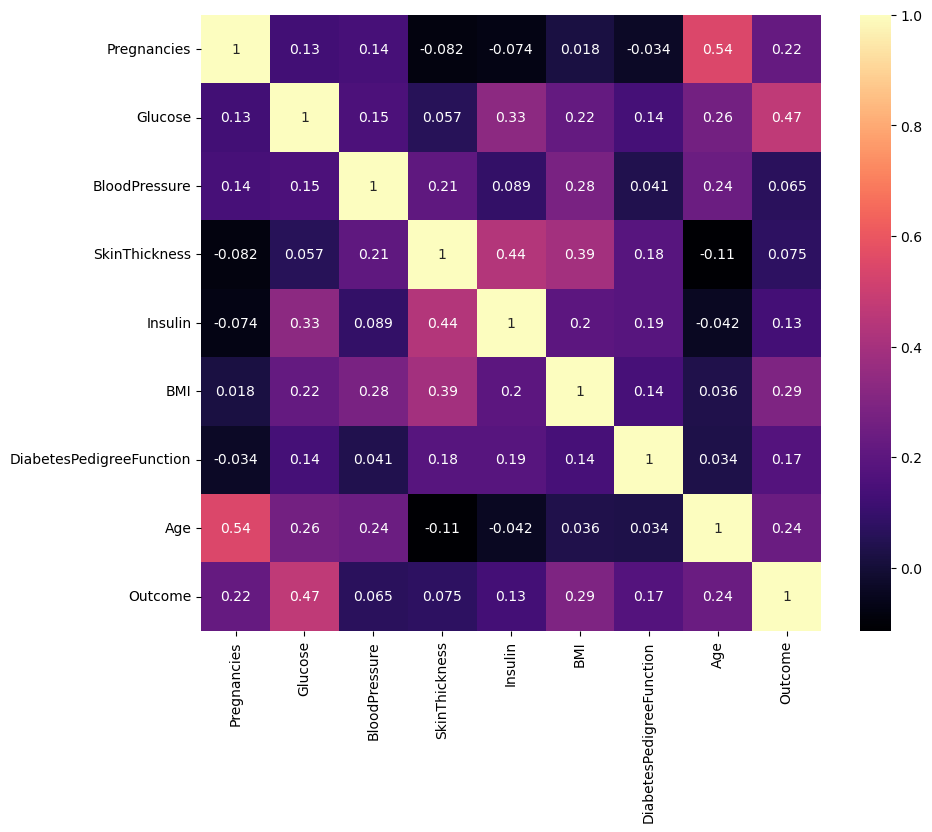

In [8]:
#Visual representation of the correalation between the columns of the dataset
data.corr()
f, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(data.corr(), annot=True, ax=ax, cmap='magma')

In [9]:
#Displaying the number of diabetic and non-diabetic people
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

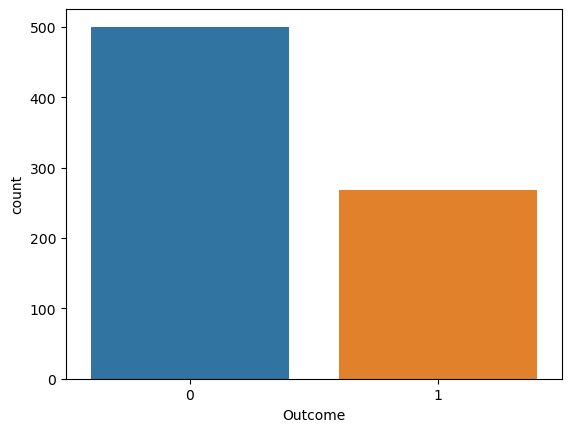

In [10]:
#Graph representing number of diabetic and non-diabetic people
sns.countplot(x=data.Outcome)

In [11]:
#Taking the mean of the values in each column
column_names = data.columns
column_names = column_names.drop('Outcome')
for name in column_names:
    print('{}\n'.format(name))
    print(data.groupby(['Outcome'])[name].mean())
    print('*'*50)
    print()

Pregnancies

Outcome
0    3.298000
1    4.865672
Name: Pregnancies, dtype: float64
**************************************************

Glucose

Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64
**************************************************

BloodPressure

Outcome
0    68.184000
1    70.824627
Name: BloodPressure, dtype: float64
**************************************************

SkinThickness

Outcome
0    19.664000
1    22.164179
Name: SkinThickness, dtype: float64
**************************************************

Insulin

Outcome
0     68.792000
1    100.335821
Name: Insulin, dtype: float64
**************************************************

BMI

Outcome
0    30.304200
1    35.142537
Name: BMI, dtype: float64
**************************************************

DiabetesPedigreeFunction

Outcome
0    0.429734
1    0.550500
Name: DiabetesPedigreeFunction, dtype: float64
**************************************************

Age

Outcome
0    31.190000
1    37.067

In [12]:
#Droping the values with 0 entries(NaN values)
data.SkinThickness.replace(0, data.SkinThickness.median(), inplace=True)
data.Insulin.replace(0, data.Insulin.median(), inplace=True)
data.Glucose.replace(0, data.Glucose.median(), inplace=True)
data.BloodPressure.replace(0, data.BloodPressure.median(), inplace=True)
data.BMI.replace(0, data.BMI.median(), inplace=True)

C:\Users\tarun\AppData\Local\Temp\ipykernel_14120\3829713014.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Pregnancies, ax=axes[0,0])
C:\Users\tarun\AppData\Local\Temp\ipykernel_14120\3829713014.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Glucose, ax=axes[0,1])
C:\Users\t

<Axes: xlabel='Age', ylabel='Density'>

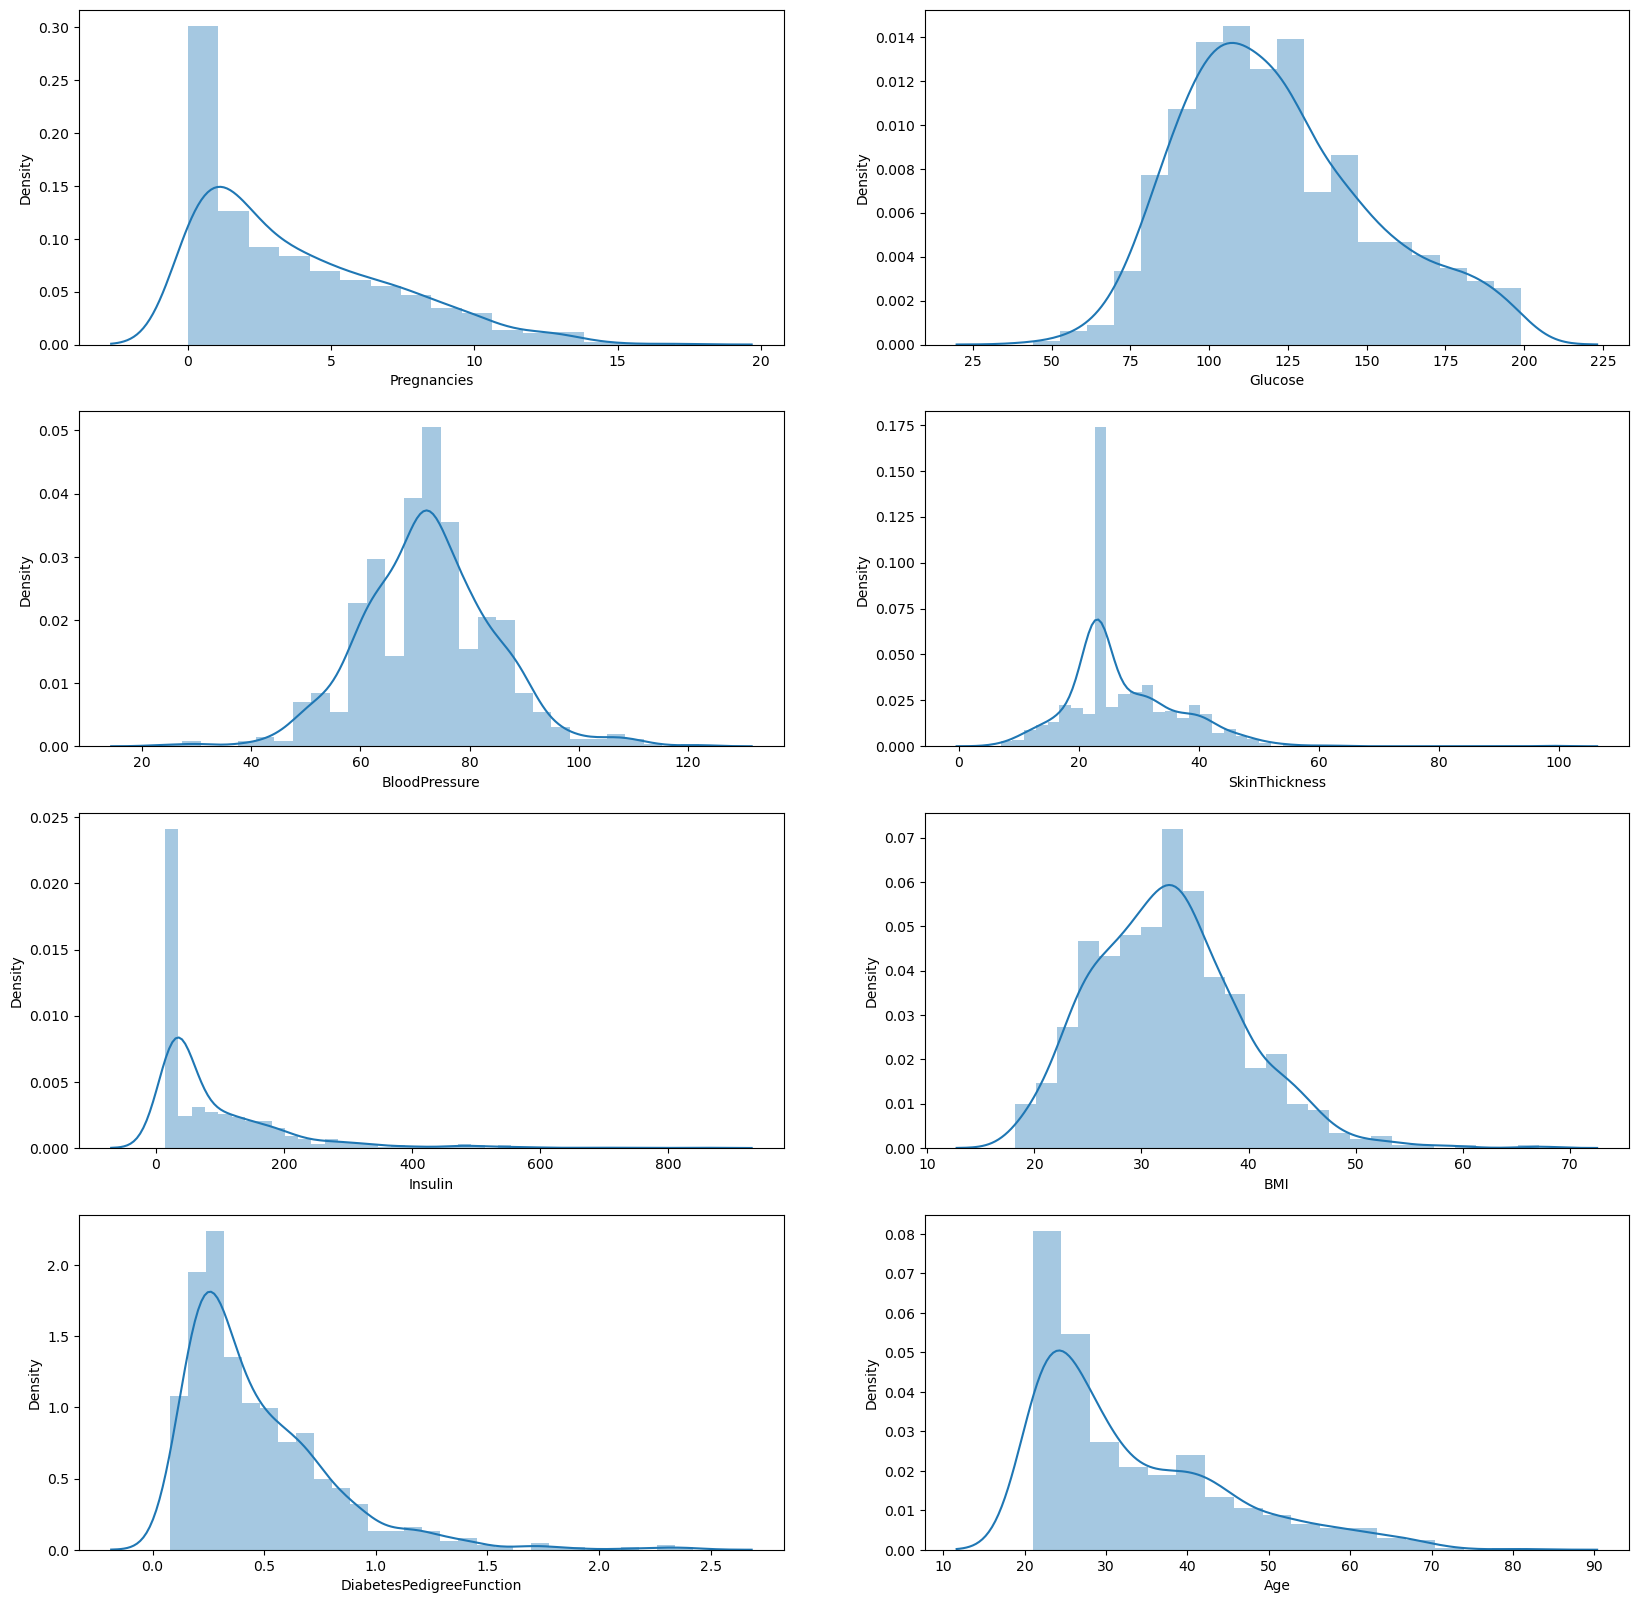

In [13]:
#Visual representation of the dataset after droping the NaN values
f, axes = plt.subplots(4,2, figsize=(20,20))
sns.distplot(data.Pregnancies, ax=axes[0,0])
sns.distplot(data.Glucose, ax=axes[0,1])
sns.distplot(data.BloodPressure, ax=axes[1,0])
sns.distplot(data.SkinThickness, ax=axes[1,1])
sns.distplot(data.Insulin, ax=axes[2,0])
sns.distplot(data.BMI, ax=axes[2,1])
sns.distplot(data.DiabetesPedigreeFunction, ax=axes[3,0])
sns.distplot(data.Age, ax=axes[3,1])

In [ ]:
#Spilitting the data into X and Y
X=data.drop(columns='Outcome', axis=1)
Y=data['Outcome']

In [ ]:
#Displaying the data in X
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35     30.5  33.6   
1              1       85             66             29     30.5  26.6   
2              8      183             64             23     30.5  23.3   
3              1       89             66             23     94.0  28.1   
4              0      137             40             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48    180.0  32.9   
764            2      122             70             27     30.5  36.8   
765            5      121             72             23    112.0  26.2   
766            1      126             60             23     30.5  30.1   
767            1       93             70             31     30.5  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
#Displaying the data in Y
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
#Importing standard scaler
scaler=StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
#Standardising the data
standard_data=scaler.transform(X)
print(standard_data)

[[ 0.63994726  0.86604475 -0.03198993 ...  0.16724016  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20506583 -0.5283186  ... -0.85155088 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01666174 -0.69376149 ... -1.33183808  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02157407 -0.03198993 ... -0.90976751 -0.68519336
  -0.27575966]
 [-0.84488505  0.14279979 -1.02464727 ... -0.34215536 -0.37110101
   1.17073215]
 [-0.84488505 -0.94206766 -0.19743282 ... -0.29849289 -0.47378505
  -0.87137393]]


In [ ]:
#Assigning values to X and Y
X=standard_data
print(X)
Y=data['Outcome']
print(Y)

[[ 0.63994726  0.86604475 -0.03198993 ...  0.16724016  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20506583 -0.5283186  ... -0.85155088 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01666174 -0.69376149 ... -1.33183808  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02157407 -0.03198993 ... -0.90976751 -0.68519336
  -0.27575966]
 [-0.84488505  0.14279979 -1.02464727 ... -0.34215536 -0.37110101
   1.17073215]
 [-0.84488505 -0.94206766 -0.19743282 ... -0.29849289 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
#Splitting the data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
# SVM model

classifier=svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
#Predicting the accuracy of training data
X_train_prediction=classifier.predict(X_train)
accuracy=accuracy_score(X_train_prediction,Y_train)
print("Accuracy of the training data:",accuracy)

Accuracy of the training data: 0.7801302931596091


In [ ]:
#Predicting the accuracy of test data
X_test_prediction = classifier.predict(X_test)
test_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy of the test data:",test_accuracy)

Accuracy of the test data: 0.7727272727272727


In [ ]:
#predictive model
input_data=(8,183,64,0,0,23.3,0.672,32)
input_array=np.asarray(input_data)
reshaped=input_array.reshape(1,-1)
std_data=scaler.transform(reshaped)
print(std_data)
prediction=classifier.predict(std_data)
print(prediction)
if prediction[0]==0:
  print("This person is not diabetic")
else:
  print("This person is diabetic")

[[ 1.23388019  2.01666174 -0.69376149 -2.96374541 -0.89735842 -1.33183808
   0.60439732 -0.10558415]]
[1]
This person is diabetic


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
